In [1]:
import torch, torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision import models

import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(torch.__version__)
!python --version

0.4.0
Python 3.6.4 :: Anaconda, Inc.


In [3]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [4]:
# Setting some hyperparameters
batchSize = 4
num_epochs = 5

In [5]:
transform_to = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
# Trying this out
# transform_to = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])

In [6]:
# Loading the datasets
train_data = torchvision.datasets.MNIST(root = './data',transform = transform_to, download = True)
trainLoader = torch.utils.data.DataLoader(train_data, batch_size=batchSize, shuffle = True)

test_data = torchvision.datasets.MNIST(root = './data', train = False, transform = transform_to,download = True )
testLoader = torch.utils.data.DataLoader(test_data,batch_size=batchSize)

In [7]:
def imgshow(images,labels = None):
    fig = plt.figure(figsize = (10,10))
    for i in range(batchSize):
        ax = plt.subplot(1,batchSize,i+1)
        unnormalized_img = images[i]*0.3081 + 0.1307
        plt.imshow(unnormalized_img,cmap = 'gray')
        plt.axis('off')
        if labels is not None:
            plt.title(labels[i])
    

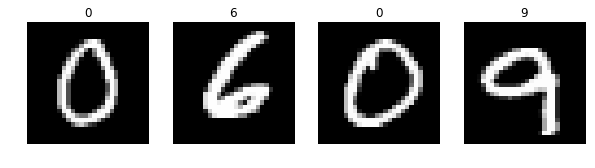

In [8]:
# Viewing a few images

sample_data = next(iter(trainLoader))
images,labels = sample_data
imgshow(images.numpy().squeeze(),labels.numpy())

In [9]:
# Defining the network for running

class CNN_Network(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,20,5)
        self.conv2 = nn.Conv2d(20,50,5)
        self.max_pool = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(4*4*50,20)
        self.fc2 = nn.Linear(20,10)
    
    
    def forward(self,x):
        
        x = self.max_pool(F.relu(self.conv1(x)))
        x = self.max_pool(F.relu(self.conv2(x)))
        x = x.view(-1,4*4*50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
        
        

In [10]:
def train(network,optimizer,loss_criteria):
    loss_list = []
    for epoch in range(num_epochs):
        running_loss = 0.0
        epoch_loss = []
        for i,data in enumerate(trainLoader):
            images,labels = data
            images,labels = Variable(images).to(device),Variable(labels).to(device)
            
            optimizer.zero_grad()
            outputs = network(images)

            loss = loss_criteria(outputs,labels)
            epoch_loss.append(loss.item())
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            
            if (i+1)%2000==0:
                avg_loss = running_loss/2000
                print(f'Epoch:{epoch+1} Iteration:{i+1} Loss:{avg_loss: .3f}')
                running_loss = 0.0
        loss_list.append(np.array(epoch_loss).mean())
    print('Finished Training')
    return loss_list

In [11]:
# Plotting training loss

def plot_train_loss(losses,optmzr,LossFunc):
    plt.plot(losses)
    plt.title(f'Training loss with {optmzr} and {LossFunc}')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')

In [12]:
# Predicting on test data

def predict_on_test(network):
    correct = 0
    total = 0

    for data in testLoader:
        images,labels = data
        outputs = network(Variable(images).to(device))
        class_scores,preds = torch.max(outputs.data,1)
        total += len(labels)
        correct += (preds == labels.to(device)).sum().item()

    print(f'Accuracy on test data: {correct*100/total}%')    

<b> Cross Entropy Loss and SGD

In [13]:
net = CNN_Network().to(device)

In [14]:
# Network architecture
net.eval()

CNN_Network(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
  (max_pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=800, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=10, bias=True)
)

In [15]:
loss_criteria1 = nn.CrossEntropyLoss()
optimizer1 = optim.SGD(net.parameters(), lr = 0.001, momentum= 0.9)

In [16]:
CE_SGD_loss = train(net,optimizer1,loss_criteria1)

Epoch:1 Iteration:2000 Loss: 0.487
Epoch:1 Iteration:4000 Loss: 0.147
Epoch:1 Iteration:6000 Loss: 0.111
Epoch:1 Iteration:8000 Loss: 0.097
Epoch:1 Iteration:10000 Loss: 0.083
Epoch:1 Iteration:12000 Loss: 0.070
Epoch:1 Iteration:14000 Loss: 0.068
Epoch:2 Iteration:2000 Loss: 0.045
Epoch:2 Iteration:4000 Loss: 0.054
Epoch:2 Iteration:6000 Loss: 0.042
Epoch:2 Iteration:8000 Loss: 0.049
Epoch:2 Iteration:10000 Loss: 0.043
Epoch:2 Iteration:12000 Loss: 0.052
Epoch:2 Iteration:14000 Loss: 0.041
Epoch:3 Iteration:2000 Loss: 0.031
Epoch:3 Iteration:4000 Loss: 0.036
Epoch:3 Iteration:6000 Loss: 0.035
Epoch:3 Iteration:8000 Loss: 0.035
Epoch:3 Iteration:10000 Loss: 0.034
Epoch:3 Iteration:12000 Loss: 0.033
Epoch:3 Iteration:14000 Loss: 0.032
Epoch:4 Iteration:2000 Loss: 0.028
Epoch:4 Iteration:4000 Loss: 0.026
Epoch:4 Iteration:6000 Loss: 0.022
Epoch:4 Iteration:8000 Loss: 0.025
Epoch:4 Iteration:10000 Loss: 0.027
Epoch:4 Iteration:12000 Loss: 0.023
Epoch:4 Iteration:14000 Loss: 0.029
Epoch:5 

In [17]:
CE_SGD_loss

[0.1467262256860733,
 0.04688969598412514,
 0.033236270447572075,
 0.02603090745806694,
 0.020239187014102936]

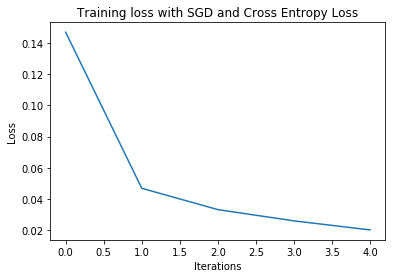

In [18]:
plot_train_loss(CE_SGD_loss,'SGD','Cross Entropy Loss')

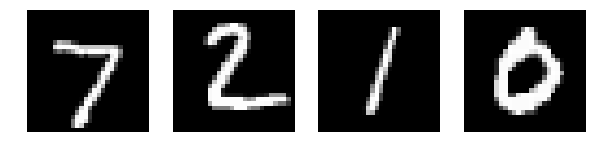

In [19]:
# Displaying a few test images

sample_test = next(iter(testLoader))
images,labels = sample_test
imgshow(images.numpy().squeeze())

In [20]:
predict_on_test(net)

Accuracy on test data: 99.09%


<b> Using Adam and Cross Entropy Loss

In [21]:
net_adam = CNN_Network().to(device)

In [22]:
optimizer2 = optim.Adam(net_adam.parameters())

In [23]:
CE_Adam_loss = train(net_adam,optimizer2,loss_criteria1)

Epoch:1 Iteration:2000 Loss: 0.389
Epoch:1 Iteration:4000 Loss: 0.131
Epoch:1 Iteration:6000 Loss: 0.103
Epoch:1 Iteration:8000 Loss: 0.091
Epoch:1 Iteration:10000 Loss: 0.086
Epoch:1 Iteration:12000 Loss: 0.069
Epoch:1 Iteration:14000 Loss: 0.056
Epoch:2 Iteration:2000 Loss: 0.051
Epoch:2 Iteration:4000 Loss: 0.059
Epoch:2 Iteration:6000 Loss: 0.051
Epoch:2 Iteration:8000 Loss: 0.043
Epoch:2 Iteration:10000 Loss: 0.051
Epoch:2 Iteration:12000 Loss: 0.049
Epoch:2 Iteration:14000 Loss: 0.053
Epoch:3 Iteration:2000 Loss: 0.031
Epoch:3 Iteration:4000 Loss: 0.044
Epoch:3 Iteration:6000 Loss: 0.035
Epoch:3 Iteration:8000 Loss: 0.038
Epoch:3 Iteration:10000 Loss: 0.038
Epoch:3 Iteration:12000 Loss: 0.044
Epoch:3 Iteration:14000 Loss: 0.040
Epoch:4 Iteration:2000 Loss: 0.024
Epoch:4 Iteration:4000 Loss: 0.034
Epoch:4 Iteration:6000 Loss: 0.031
Epoch:4 Iteration:8000 Loss: 0.028
Epoch:4 Iteration:10000 Loss: 0.042
Epoch:4 Iteration:12000 Loss: 0.041
Epoch:4 Iteration:14000 Loss: 0.036
Epoch:5 

In [24]:
CE_Adam_loss

[0.12793874488075574,
 0.05061449485818545,
 0.0392896095464627,
 0.03432819336770723,
 0.029379665671723586]

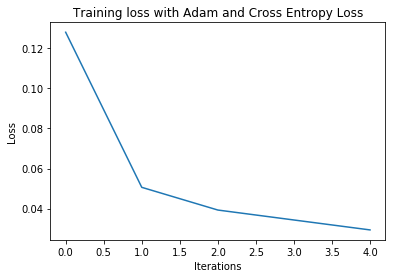

In [25]:
plot_train_loss(CE_Adam_loss,'Adam','Cross Entropy Loss')

In [26]:
predict_on_test(net_adam)

Accuracy on test data: 98.89%


<b> RMSProp with Cross Entropy Loss

In [27]:
net_rms = CNN_Network().to(device)

In [28]:
optimizer3 = optim.RMSprop(net_rms.parameters(),lr = 0.01, momentum = 0.9)

In [29]:
CE_RMS_loss = train(net_rms,optimizer3,loss_criteria1)

Epoch:1 Iteration:2000 Loss: 2.721
Epoch:1 Iteration:4000 Loss: 2.337
Epoch:1 Iteration:6000 Loss: 2.337
Epoch:1 Iteration:8000 Loss: 2.340
Epoch:1 Iteration:10000 Loss: 2.338
Epoch:1 Iteration:12000 Loss: 2.338
Epoch:1 Iteration:14000 Loss: 2.341
Epoch:2 Iteration:2000 Loss: 2.340
Epoch:2 Iteration:4000 Loss: 2.338
Epoch:2 Iteration:6000 Loss: 2.337
Epoch:2 Iteration:8000 Loss: 2.335
Epoch:2 Iteration:10000 Loss: 2.337
Epoch:2 Iteration:12000 Loss: 2.337
Epoch:2 Iteration:14000 Loss: 2.335
Epoch:3 Iteration:2000 Loss: 2.336
Epoch:3 Iteration:4000 Loss: 2.339
Epoch:3 Iteration:6000 Loss: 2.338
Epoch:3 Iteration:8000 Loss: 2.341
Epoch:3 Iteration:10000 Loss: 2.339
Epoch:3 Iteration:12000 Loss: 2.337
Epoch:3 Iteration:14000 Loss: 2.336
Epoch:4 Iteration:2000 Loss: 2.337
Epoch:4 Iteration:4000 Loss: 2.339
Epoch:4 Iteration:6000 Loss: 2.341
Epoch:4 Iteration:8000 Loss: 2.336
Epoch:4 Iteration:10000 Loss: 2.337
Epoch:4 Iteration:12000 Loss: 2.337
Epoch:4 Iteration:14000 Loss: 2.336
Epoch:5 

In [30]:
CE_RMS_loss

[2.3892380762020746,
 2.3365589092731476,
 2.3379768923600515,
 2.3373049317359924,
 2.3384570117712022]

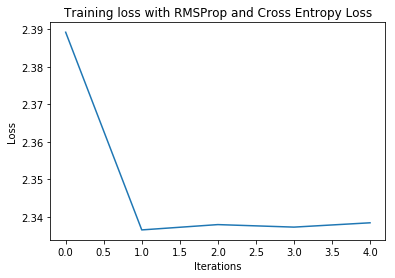

In [31]:
plot_train_loss(CE_RMS_loss,'RMSProp','Cross Entropy Loss')

In [32]:
predict_on_test(net_rms)

Accuracy on test data: 11.35%


<i> We observe that we get the best results when we use Stochastic Gradient Descent as optimizer and Cross Entropy Loss as the loss function. </i><br>

<b>Analyzing the predictions made by the network</b>
    

In [33]:
# Loading all the test images again 
test_images = torchvision.datasets.MNIST(root= './data',train=False, transform=transform_to, download = False)
test_analysis_data = torch.utils.data.DataLoader(test_images,batch_size=len(test_images))

In [34]:
analysis_data = next(iter(test_analysis_data))

In [35]:
analysis_images = analysis_data[0].numpy()

In [36]:
# Getting predictions on test data
test_outputs = net(Variable(analysis_data[0]).to(device))
test_scores, preds = torch.max(test_outputs.data,1)

In [37]:
labels = analysis_data[1].numpy()
preds = preds.cpu().numpy()
test_scores = test_scores.cpu().numpy()

<b> Random Correct Predictions

In [38]:
correct_labels = np.where(preds==labels)[0]
print(f'Total correct predictions:{len(correct_labels)}')
indexes = np.random.choice(correct_labels,4,replace = False)

Total correct predictions:9909


Note: Images have titles representing the correct label names

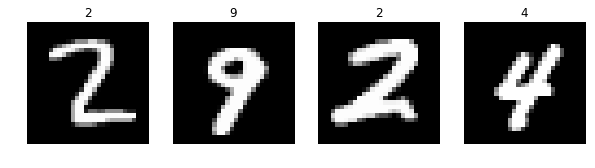

In [39]:
imgshow(analysis_images[indexes].squeeze(), preds[indexes])

<b> Random Incorrect Predictions

In [40]:
incorrect_labels = np.where(preds != labels)[0]
print(f'Total incorrect predictions:{len(incorrect_labels)}')
incorrect_indexes = np.random.choice(incorrect_labels,4,replace=False)

Total incorrect predictions:91


[9 7 9 2]


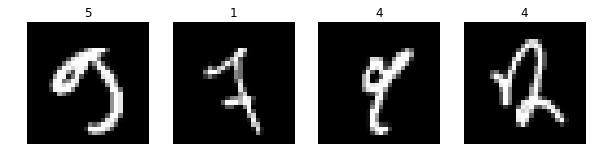

In [41]:
print(labels[incorrect_indexes])
imgshow(analysis_images[incorrect_indexes].squeeze(), preds[incorrect_indexes])

<b> Most Correct Predictions

In [42]:
correct_scores = test_scores[correct_labels]
most_correct_preds = np.argsort(correct_scores)[::-1][:4]

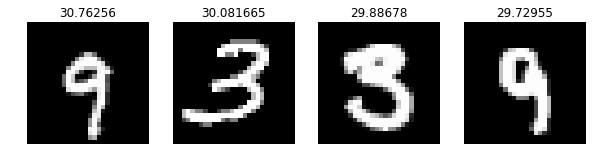

In [43]:
imgshow(analysis_images[most_correct_preds].squeeze(),correct_scores[most_correct_preds])

<b> Most incorrect Predictions

In [44]:
incorrect_scores = test_scores[incorrect_labels]
wrong_labels = labels[incorrect_labels]
most_incorrect_preds = np.argsort(incorrect_scores)[::-1][:4]

Predictions:[5 3 7 5] 


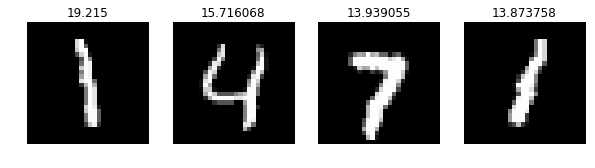

In [45]:
imgshow(analysis_images[most_incorrect_preds].squeeze(),incorrect_scores[most_incorrect_preds])
print(f'Predictions:{wrong_labels[most_incorrect_preds]} ')